### Load Data and Make Plots

The first task is to load the data, and then make some plots. We shall focus on the primis data for now, since it is one of the smaller ones.

In [6]:
import pickle
import numpy as np
import tensorflow as tf
import cv2

"""
This class is needed to unpickle the data objects.
"""
class MacOSFile():

    def __init__(self, f):
        self.f = f

    def __getattr__(self, item):
        return getattr(self.f, item)

    def read(self, n):
        # print("reading total_bytes=%s" % n, flush=True)
        if n >= (1 << 31):
            buffer = bytearray(n)
            idx = 0
            while idx < n:
                batch_size = min(n - idx, 1 << 31 - 1)
                # print("reading bytes [%s,%s)..." % (idx, idx + batch_size),
                # \ end="", flush=True)
                buffer[idx:idx + batch_size] = self.f.read(batch_size)
                # print("done.", flush=True)
                idx += batch_size
            return buffer
        return self.f.read(n)

    def write(self, buffer):
        n = len(buffer)
        print("writing total_bytes=%s..." % n, flush=True)
        idx = 0
        while idx < n:
            batch_size = min(n - idx, 1 << 31 - 1)
            print("writing bytes [%s, %s)... " % (idx, idx + batch_size),
                  end="", flush=True)
            self.f.write(buffer[idx:idx + batch_size])
            print("done.", flush=True)
            idx += batch_size


def pickle_load(file_path):
    """Wrapper of pickle.load"""
    with open(file_path, "rb") as f:
        return pickle.load(MacOSFile(f))

In [17]:
pX = pickle_load('../data/primis_X.npy')
pY = pickle_load('../data/primis_y.npy')

pX is a numpy array with shape (105843, 32, 32, 3) and pX has shape (105843, 1). 

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

The code below plots 3 parking lots that are occupied. After that, we plot three parking lots that are not occupied. The resolution has gone down, and the cars are not fully recognisable. It seems that we are just looking for "occupation by something big?", not occupation by car per se.

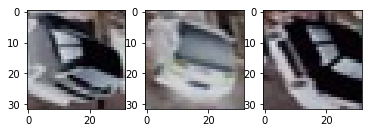

In [61]:
[im5] = (np.where(pY.ravel()[:50] == 1))
im5 = im5[0:3]

plt.figure(1)

for ii in np.arange(3):
    plt.subplot(1, 3, ii+1)
    plt.imshow(pX[im5[ii]])
    
plt.show()

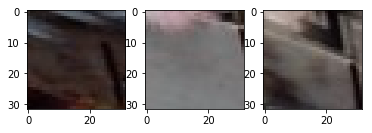

In [62]:
[im5] = (np.where(pY.ravel()[:50] == 0))
im5 = im5[0:3]

plt.figure(1)

for ii in np.arange(3):
    plt.subplot(1, 3, ii+1)
    plt.imshow(pX[im5[ii]])
    
plt.show()

In [ ]:
%run iteration-tribus-Copy1.py --name=primis --batchsize=1024 --testingpct=1